In [42]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
dataset = pd.read_csv("time_series_covid_19_confirmed.csv")
dataset_death = pd.read_csv("time_series_covid_19_deaths.csv")
dataset_recovered = pd.read_csv('time_series_covid_19_recovered.csv')

In [3]:
df = dataset.iloc[:,4:].T
df

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,...,236,237,238,239,240,241,242,243,244,245,246,247,248,249,250,251,252,253,254,255,256,257,258,259,260,261,262,263,264,265,266,267,268,269,270,271,272,273,274,275
1/22/20,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,4,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1/23/20,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,4,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,2,0,0,0,0
1/24/20,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,3,0,0,5,0,0,0,0,0,2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,2,0,0,0,0
1/25/20,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,3,0,0,6,0,0,0,0,0,2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,2,0,0,0,0
1/26/20,0,0,0,0,0,0,0,0,0,3,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,4,0,0,8,0,0,0,0,0,5,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,2,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5/25/21,66903,132229,127361,13664,32933,1258,3586736,222139,124,5576,171,1611,750,234,20563,1017,642138,332894,11597,223613,792196,4000,387818,1050677,12777,8025,1423,355349,203513,52865,16194209,236,417133,13416,143296,4568,29549,26329,77733,225034,...,169900,34889,13495,1064375,690123,24252,5456,13308,509,135439,5816,13384,20879,337529,5203385,33166418,44074,2244084,559291,109,2490,248,578,4065,63,4290,1591,20,4,2409,4467310,271859,98849,4,226136,5931,306334,6670,93428,38706
5/26/21,67743,132244,127646,13671,33338,1258,3622135,222269,124,5576,172,1613,752,234,20575,1017,642583,333097,11597,226416,793693,4004,388987,1052652,12784,8058,1464,358562,203658,52865,16274695,240,417526,13419,143318,4592,29763,26989,77982,225424,...,172277,34889,13720,1067107,691119,24315,6091,13308,509,137894,6245,13396,21461,338853,5212123,33190470,44281,2247605,561048,109,2491,248,581,4065,63,4290,1591,20,4,2409,4470297,276435,99064,4,227407,6086,306795,6688,93627,38819
5/27/21,68366,132264,127926,13682,33607,1258,3663215,222409,124,5579,172,1615,752,234,20581,1017,643168,333317,11622,229468,794985,4006,390203,1055543,12789,8058,1491,361580,203762,53771,16342162,241,417819,13421,143414,4650,29939,27638,77982,225937,...,174861,34889,14012,1068473,692111,24365,6761,13308,509,143280,6459,13420,21987,340250,5220549,33217995,44594,2251242,563215,109,2491,248,581,4065,63,4292,1591,20,4,2411,4473677,280372,99344,4,228828,6356,306795,6696,93947,38854
5/28/21,69130,132285,128198,13693,33944,1259,3702422,222513,124,5580,173,1616,752,234,20587,1017,643709,333559,11684,232425,796343,4009,391637,1057903,12791,8058,1503,364570,203839,53771,16391930,241,418106,13424,143486,4669,30122,28237,77982,226449,...,177711,35289,14305,1068473,693023,24410,7315,13308,509,147039,6622,13432,22620,341952,5228322,33239963,45231,2254674,565451,109,2491,248,581,4065,63,4293,1592,20,4,2411,4477705,282198,99580,4,230147,6396,307569,6723,94430,38918


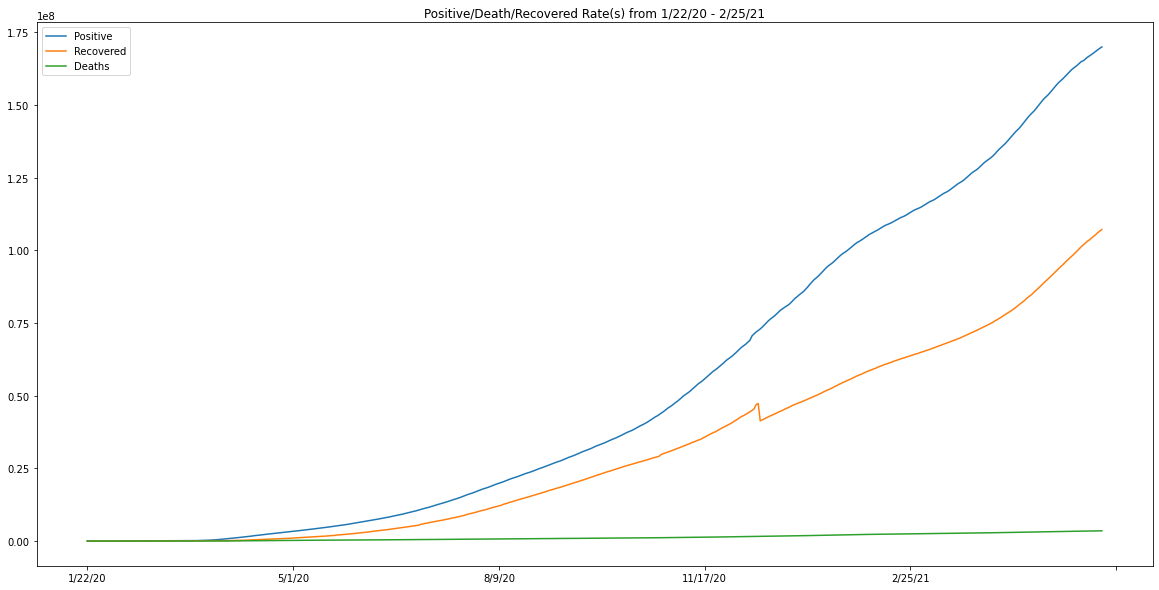

In [4]:

xdf = {'Positive':df.sum(axis = 1),
      'Recovered':dataset_recovered.iloc[:,4:].T.sum(axis = 1),
      'Deaths':dataset_death.iloc[:,4:].T.sum(axis = 1)}
pd.DataFrame(xdf).plot(title ="Positive/Death/Recovered Rate(s) from 1/22/20 - 2/25/21" ,
                      figsize= (20,10))

# FbProphet

In [5]:
data = pd.DataFrame(dataset_death.iloc[:,4:].T.sum(axis = 1))
data

,0
1/22/20,17
1/23/20,18
1/24/20,26
1/25/20,42
1/26/20,56
...,...
5/25/21,3485788
5/26/21,3498544
5/27/21,3511297
5/28/21,3523117


In [7]:
!pip install fbprophet

In [12]:
data = data.reset_index()
data.columns = ['ds','y']
data

,ds,y
0,1/22/20,17
1,1/23/20,18
2,1/24/20,26
3,1/25/20,42
4,1/26/20,56
...,...,...
489,5/25/21,3485788
490,5/26/21,3498544
491,5/27/21,3511297
492,5/28/21,3523117


In [9]:
from fbprophet import Prophet

In [21]:
model = Prophet()
model.fit(data)

INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


In [22]:
future_dates = model.make_future_dataframe(periods=15)
future_dates

,ds
0,2020-01-22
1,2020-01-23
2,2020-01-24
3,2020-01-25
4,2020-01-26
...,...
504,2021-06-09
505,2021-06-10
506,2021-06-11
507,2021-06-12


In [18]:
forecasting = model.predict(future_dates)
forecasting[['ds','yhat']]

,ds,yhat
0,2020-01-22,-8.108261e+02
1,2020-01-23,2.578310e+02
2,2020-01-24,1.202833e+03
3,2020-01-25,8.962546e+02
4,2020-01-26,-1.580376e+03
...,...,...
504,2021-06-09,3.617688e+06
505,2021-06-10,3.629598e+06
506,2021-06-11,3.641385e+06
507,2021-06-12,3.651920e+06


In [39]:
prediction = model.predict(pd.DataFrame({'ds':future_dates['ds'][-30:]}))
prediction

,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,additive_terms,additive_terms_lower,additive_terms_upper,weekly,weekly_lower,weekly_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yhat
0,2021-05-15,3.344183e+06,3.330333e+06,3.362908e+06,3.344183e+06,3.344183e+06,1513.524499,1513.524499,1513.524499,1513.524499,1513.524499,1513.524499,0.0,0.0,0.0,3.345696e+06
1,2021-05-16,3.355119e+06,3.338075e+06,3.370336e+06,3.355119e+06,3.355119e+06,-1057.757494,-1057.757494,-1057.757494,-1057.757494,-1057.757494,-1057.757494,0.0,0.0,0.0,3.354061e+06
2,2021-05-17,3.366056e+06,3.346712e+06,3.379086e+06,3.366056e+06,3.366056e+06,-2332.909255,-2332.909255,-2332.909255,-2332.909255,-2332.909255,-2332.909255,0.0,0.0,0.0,3.363723e+06
3,2021-05-18,3.376992e+06,3.359035e+06,3.392089e+06,3.376992e+06,3.376992e+06,-1192.411654,-1192.411654,-1192.411654,-1192.411654,-1192.411654,-1192.411654,0.0,0.0,0.0,3.375800e+06
4,2021-05-19,3.387929e+06,3.370588e+06,3.405087e+06,3.387929e+06,3.387929e+06,90.397137,90.397137,90.397137,90.397137,90.397137,90.397137,0.0,0.0,0.0,3.388019e+06
5,2021-05-20,3.398866e+06,3.384108e+06,3.415968e+06,3.398866e+06,3.398866e+06,1064.403136,1064.403136,1064.403136,1064.403136,1064.403136,1064.403136,0.0,0.0,0.0,3.399930e+06
6,2021-05-21,3.409802e+06,3.394840e+06,3.428357e+06,3.409802e+06,3.409802e+06,1914.753630,1914.753630,1914.753630,1914.753630,1914.753630,1914.753630,0.0,0.0,0.0,3.411717e+06
7,2021-05-22,3.420739e+06,3.406721e+06,3.439849e+06,3.420739e+06,3.420739e+06,1513.524499,1513.524499,1513.524499,1513.524499,1513.524499,1513.524499,0.0,0.0,0.0,3.422252e+06
8,2021-05-23,3.431675e+06,3.414606e+06,3.446242e+06,3.431675e+06,3.431675e+06,-1057.757494,-1057.757494,-1057.757494,-1057.757494,-1057.757494,-1057.757494,0.0,0.0,0.0,3.430617e+06
9,2021-05-24,3.442612e+06,3.423654e+06,3.457497e+06,3.442612e+06,3.442612e+06,-2332.909255,-2332.909255,-2332.909255,-2332.909255,-2332.909255,-2332.909255,0.0,0.0,0.0,3.440279e+06


In [59]:
prediction = prediction[['ds','yhat']]
prediction = prediction.set_index('ds')
prediction

,yhat
ds,
2021-05-15,3.345696e+06
2021-05-16,3.354061e+06
2021-05-17,3.363723e+06
2021-05-18,3.375800e+06
2021-05-19,3.388019e+06
2021-05-20,3.399930e+06
2021-05-21,3.411717e+06
2021-05-22,3.422252e+06
2021-05-23,3.430617e+06


In [54]:
data = data.set_index('ds')
data.tail() 

,y
ds,
5/25/21,3485788
5/26/21,3498544
5/27/21,3511297
5/28/21,3523117
5/29/21,3533619


In [74]:
test[0],pred[0]

(3369435, array([3345696.11524273]))